In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [4]:
import torch.distributions as dist
from torch.distributions import MultivariateNormal

In [6]:
mean = torch.tensor([2.0, 3.0])
covariance_matrix = torch.tensor([[1.0, 0.5],
                                 [0.5, 2.0]])
mvn_distribution = MultivariateNormal(
    loc=mean, covariance_matrix=covariance_matrix)

Sampled Data Shape: torch.Size([1000, 2])
Sampled Data Mean: tensor([1.9390, 2.9668])
Sampled Data Covariance Matrix: tensor([[0.9759, 0.4904],
        [0.4904, 1.9176]])


In [7]:
num_samples = 1000
samples = mvn_distribution.sample((num_samples,))

print("Sampled Data Mean:", torch.mean(samples, dim=0))
print("Sampled Data Covariance Matrix:", torch.matmul(
    (samples - mean).T, samples - mean) / num_samples)
print("Actual Mean:", mean)
print("Actual Covariance Matrix:", covariance_matrix)

Sampled Data Mean: tensor([1.9626, 2.9814])
Sampled Data Covariance Matrix: tensor([[1.0030, 0.4721],
        [0.4721, 1.8350]])
Actual Mean: tensor([2., 3.])
Actual Covariance Matrix: tensor([[1.0000, 0.5000],
        [0.5000, 2.0000]])


In [15]:
plt.rcParams.update({'figure.figsize': (6, 4)})

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

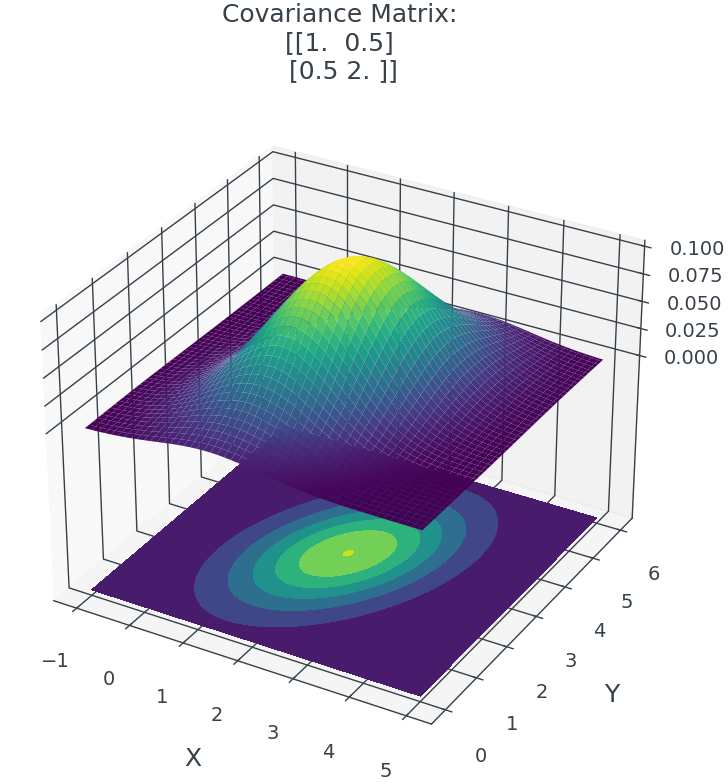

In [28]:
mean = np.array([2.0, 3.0])
covariance_matrix = np.array([[1.0, 0.5],
                              [0.5, 2.0]])

x_range = np.linspace(mean[0] - 3, mean[0] + 3, 100)
y_range = np.linspace(mean[1] - 3, mean[1] + 3, 100)
X, Y = np.meshgrid(x_range, y_range)
grid = np.column_stack((X.flatten(), Y.flatten()))

pdf_values = multivariate_normal.pdf(grid, mean, covariance_matrix)
pdf_values = pdf_values.reshape(X.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, pdf_values, cmap='viridis')
cset = ax.contourf(X, Y, pdf_values, zdir='z', offset=-0.15, cmap='viridis')
ax.set_zlim(-0.15, 0.1)
ax.set_zticks(np.linspace(0, 0.1, 5))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title(f'Covariance Matrix:\n{covariance_matrix}')
plt.savefig('figures/mle/bivariate_normal.pdf')
plt.show()